In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
cars = pd.read_csv("car_evaluation.csv", header= None, sep = ",")
cars.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
cars.columns = col_names

In [9]:
cars.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
cars.rename(columns={"maint": "maintanance"}, inplace = True)
cars.head()


,buying,maintanance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [11]:
cars.rename(columns={"maintanance": "maint"}, inplace = True)

cars.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [12]:
x = cars.drop("class", axis = 1)
y = cars["class"]

In [13]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 42)


In [39]:
# import sys
# !{sys.executable} -m pip install category_encoders

In [40]:
import category_encoders as ce

In [41]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [42]:
from sklearn.tree import DecisionTreeClassifier

## Gini index Criterion

In [43]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0, max_depth = 3)

In [44]:
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [66]:
clf_gini_predict_test = clf_gini.predict(x_test)


In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test, clf_gini_predict_test)

0.7890173410404624

In [56]:
clf_gini_predict_train = clf_gini.predict(x_train)

In [58]:
accuracy_score(y_train, clf_gini_predict_train)

0.7934362934362934

In [61]:
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.7934
Test set score: 0.7890


[Text(267.84000000000003, 380.52, 'X[5] <= 1.5\ngini = 0.452\nsamples = 1036\nvalue = [228, 40, 730, 38]'),
 Text(133.92000000000002, 271.8, 'gini = 0.0\nsamples = 342\nvalue = [0, 0, 342, 0]'),
 Text(401.76000000000005, 271.8, 'X[3] <= 2.5\ngini = 0.573\nsamples = 694\nvalue = [228, 40, 388, 38]'),
 Text(267.84000000000003, 163.07999999999998, 'X[0] <= 2.5\ngini = 0.629\nsamples = 469\nvalue = [228, 40, 163, 38]'),
 Text(133.92000000000002, 54.360000000000014, 'gini = 0.494\nsamples = 241\nvalue = [107, 0, 134, 0]'),
 Text(401.76000000000005, 54.360000000000014, 'gini = 0.644\nsamples = 228\nvalue = [121, 40, 29, 38]'),
 Text(535.6800000000001, 163.07999999999998, 'gini = 0.0\nsamples = 225\nvalue = [0, 0, 225, 0]')]

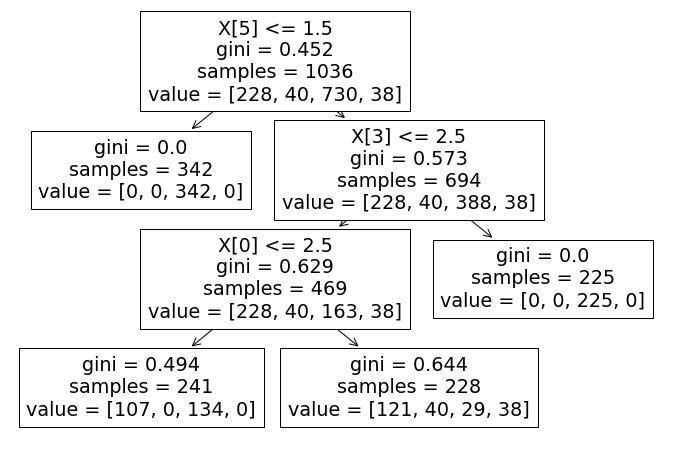

In [63]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train)) 

In [67]:
import sys
!{sys.executable} -m pip install graphviz

In [73]:
# import graphviz 
# dot_data = tree.export_graphviz(clf_gini, out_file=None, 
#                               feature_names=x_train.columns,  
#                               class_names=y_train,  
#                               filled=True, rounded=True,  
#                               special_characters=True)

# graph = graphviz.Source(dot_data) 


# Entropy

In [78]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 0)

In [79]:
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [80]:
y_pred = clf_entropy.predict(x_test)

In [81]:
accuracy_score(y_test, y_pred)

0.7890173410404624

In [83]:
x_pred = clf_entropy.predict(x_train)
accuracy_score(y_train, x_pred)

0.7934362934362934

In [84]:
print(clf_entropy.score(x_train, y_train))
print(clf_entropy.score(x_test, y_test))

0.7934362934362934
0.7890173410404624


[Text(133.92000000000002, 190.26, 'X[5] <= 1.5\nentropy = 1.193\nsamples = 1036\nvalue = [228, 40, 730, 38]'),
 Text(66.96000000000001, 135.9, 'entropy = 0.0\nsamples = 342\nvalue = [0, 0, 342, 0]'),
 Text(200.88000000000002, 135.9, 'X[3] <= 2.5\nentropy = 1.463\nsamples = 694\nvalue = [228, 40, 388, 38]'),
 Text(133.92000000000002, 81.53999999999999, 'X[0] <= 2.5\nentropy = 1.632\nsamples = 469\nvalue = [228, 40, 163, 38]'),
 Text(66.96000000000001, 27.180000000000007, 'entropy = 0.991\nsamples = 241\nvalue = [107, 0, 134, 0]'),
 Text(200.88000000000002, 27.180000000000007, 'entropy = 1.735\nsamples = 228\nvalue = [121, 40, 29, 38]'),
 Text(267.84000000000003, 81.53999999999999, 'entropy = 0.0\nsamples = 225\nvalue = [0, 0, 225, 0]')]

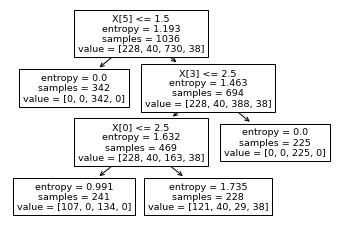

In [85]:
tree.plot_tree(clf_entropy.fit(x_train, y_train))